In [1]:
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv("NetflixAnalysis/netflix_titles.csv")


In [10]:
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [13]:
print(df["rating"].head())

0    PG-13
1    TV-MA
2    TV-MA
3    TV-MA
4    TV-MA
Name: rating, dtype: object


In [14]:
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
#df["date_added"] = pd.to_datetime(df["date_added"])
df["date_added"] = pd.to_datetime(df["date_added"].str.strip(), errors="coerce")
#allow flexible parsing

In [20]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

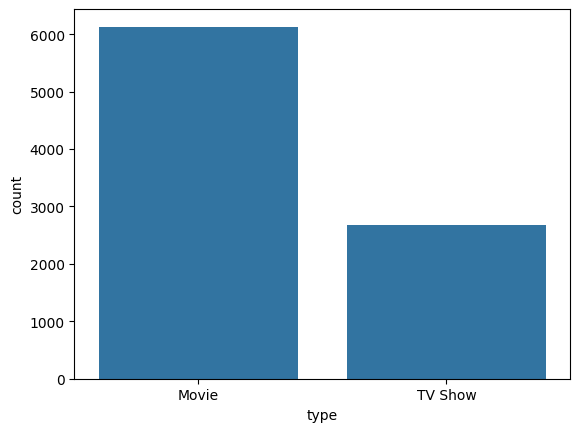

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="type", data=df)
plt.show()


In [23]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

<Axes: xlabel='year_added'>

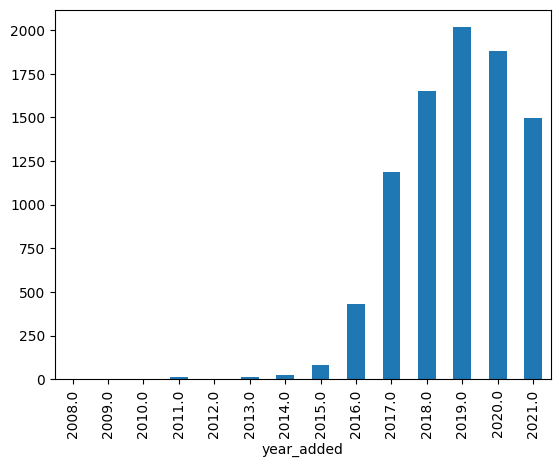

In [24]:
df["year_added"] = df["date_added"].dt.year
df["year_added"].value_counts().sort_index().plot(kind="bar")

In [25]:
df["director"].value_counts().head(10)


director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

In [28]:
from collections import Counter

genres = []
df["listed_in"].dropna().apply(lambda x: genres.extend(x.split(", ")))
Counter(genres).most_common(10)

[('International Movies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('International TV Shows', 1351),
 ('Documentaries', 869),
 ('Action & Adventure', 859),
 ('TV Dramas', 763),
 ('Independent Movies', 756),
 ('Children & Family Movies', 641),
 ('Romantic Movies', 616)]

In [30]:
actors = []
df["cast"].dropna().apply(lambda x: actors.extend(x.split(", ")))
Counter(actors).most_common(10)

[('Anupam Kher', 43),
 ('Shah Rukh Khan', 35),
 ('Julie Tejwani', 33),
 ('Naseeruddin Shah', 32),
 ('Takahiro Sakurai', 32),
 ('Rupa Bhimani', 31),
 ('Akshay Kumar', 30),
 ('Om Puri', 30),
 ('Yuki Kaji', 29),
 ('Amitabh Bachchan', 28)]

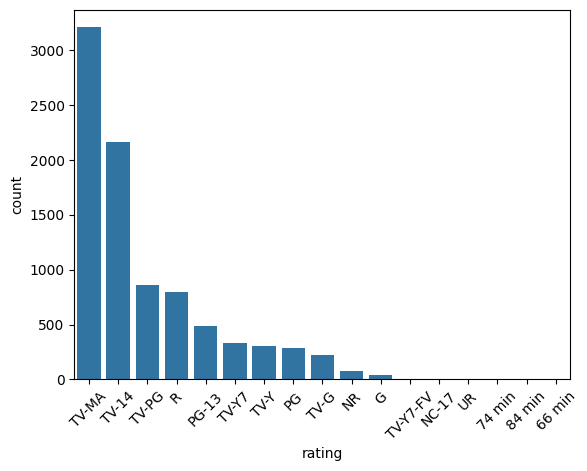

In [32]:
sns.countplot(data=df, x="rating", order=df["rating"].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [33]:
genres = []
df["listed_in"].dropna().apply(lambda x: genres.extend(x.split(", ")))
pd.Series(genres).value_counts().head(10)

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

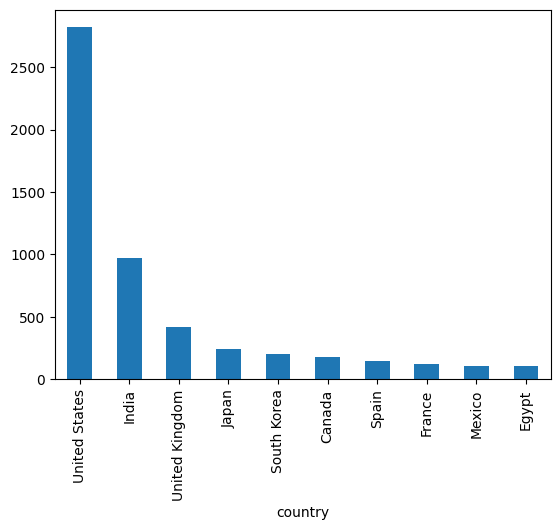

In [34]:
df["country"].value_counts().head(10).plot(kind="bar")
plt.show()